In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Flatten
from tensorflow import keras

In [ ]:
random_seed = 2024
np.random.seed(random_seed)
tf.random.set_seed(random_seed)


In [ ]:
fashion = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

X_train = train_images
X_test = test_images


y_train = train_labels
y_test = test_labels


In [ ]:
print(y_train)
print(y_test)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [ ]:
# how to determine the target variable

print(np.unique(train_labels))

# I think each of them represent the actual clothing items, 1 through 10.

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
apparel_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
                5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}

In [ ]:
counts = np.bincount(y_train, minlength=10)
names = [apparel_dict[i] for i in range(10)]

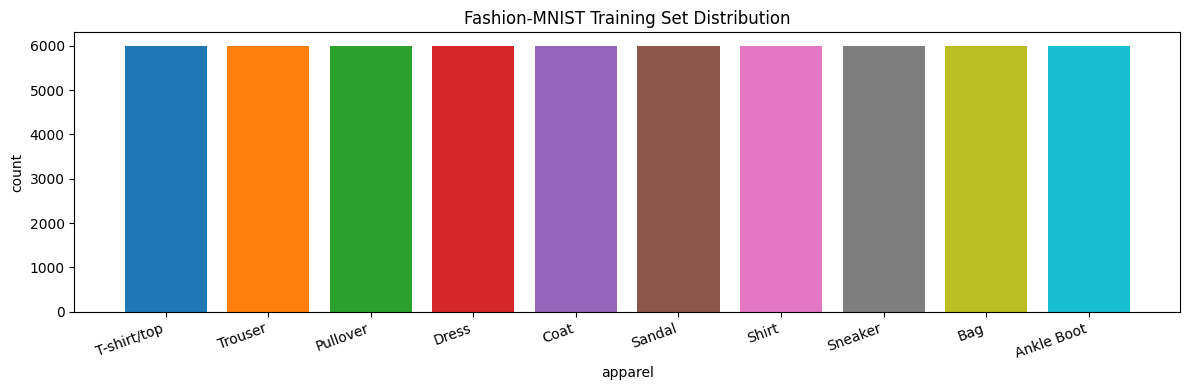

In [ ]:
colors = sns.color_palette('tab10', len(names))

# create a histogram of apparel
plt.figure(figsize=(12, 4))
plt.bar(names, counts, color=colors)
plt.xlabel("apparel")
plt.ylabel("count")
plt.xticks(rotation=20, ha="right")
plt.title("Fashion-MNIST Training Set Distribution")
plt.tight_layout()
plt.show()

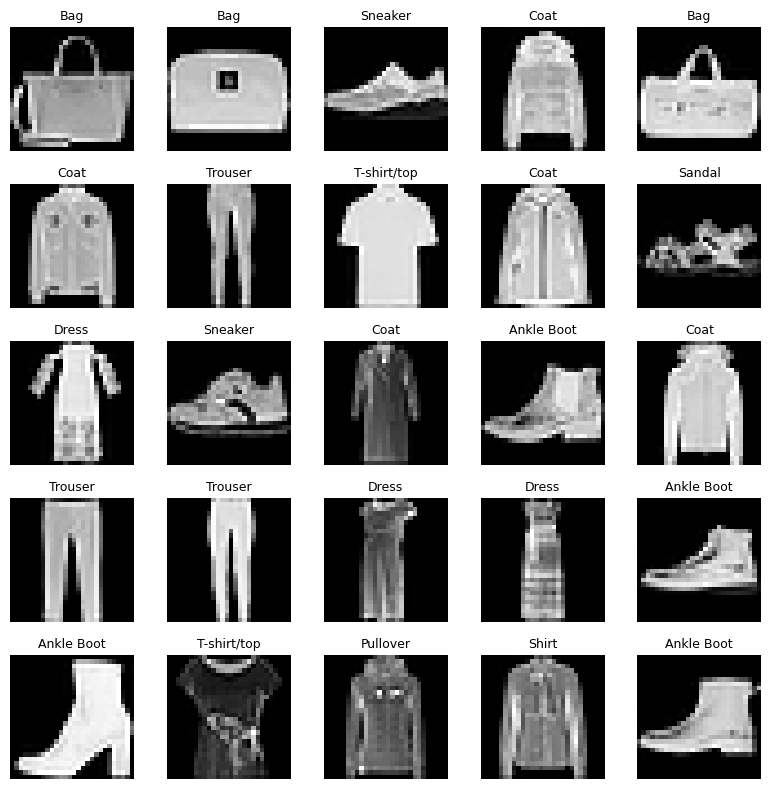

In [ ]:
np.random.seed(42)  # for reproducibility (optional)
idxs = np.random.choice(len(X_train), 25, replace=False)

# Plot
plt.figure(figsize=(8, 8))
for i, idx in enumerate(idxs, 1):
    plt.subplot(5, 5, i)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(apparel_dict[int(y_train[idx])], fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X_train_scaled = X_train.astype("float32") / 255.0
X_test_scaled  = X_test.astype("float32") / 255.0

In [ ]:
model = Sequential()

#input layer
model.add(keras.layers.Flatten(input_shape=(28, 28)))

model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))

#output layer
model.add(Dense(10, activation = "softmax"))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,710 (389.49 KB)

 Trainable params: 99,710 (389.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
my_optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = my_optimizer, metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs = 30, batch_size = 25, verbose = 2)

Epoch 1/30
2400/2400 - 8s - 3ms/step - accuracy: 0.7428 - loss: 0.7622 - val_accuracy: 0.8219 - val_loss: 0.5283
Epoch 2/30
2400/2400 - 6s - 3ms/step - accuracy: 0.8350 - loss: 0.4713 - val_accuracy: 0.8266 - val_loss: 0.4867
Epoch 3/30
2400/2400 - 7s - 3ms/step - accuracy: 0.8496 - loss: 0.4253 - val_accuracy: 0.8491 - val_loss: 0.4301
Epoch 4/30
2400/2400 - 6s - 3ms/step - accuracy: 0.8587 - loss: 0.3974 - val_accuracy: 0.8501 - val_loss: 0.4236
Epoch 5/30
2400/2400 - 7s - 3ms/step - accuracy: 0.8663 - loss: 0.3752 - val_accuracy: 0.8543 - val_loss: 0.4047
Epoch 6/30
2400/2400 - 7s - 3ms/step - accuracy: 0.8702 - loss: 0.3578 - val_accuracy: 0.8548 - val_loss: 0.4010
Epoch 7/30
2400/2400 - 9s - 4ms/step - accuracy: 0.8744 - loss: 0.3459 - val_accuracy: 0.8597 - val_loss: 0.3830
Epoch 8/30
2400/2400 - 7s - 3ms/step - accuracy: 0.8778 - loss: 0.3343 - val_accuracy: 0.8514 - val_loss: 0.3977
Epoch 9/30
2400/2400 - 7s - 3ms/step - accuracy: 0.8817 - loss: 0.3239 - val_accuracy: 0.8675 - 

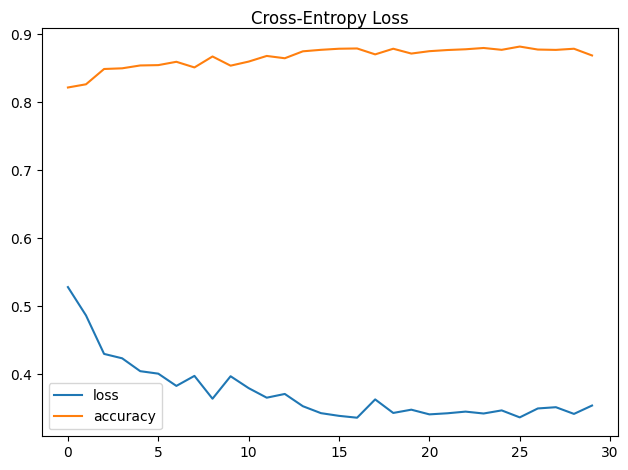

In [ ]:
plt.figure()
plt.plot(history.history['val_loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='accuracy')
plt.title('Cross-Entropy Loss', pad=-40)
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [ ]:
y_train_labels = to_categorical(y_train)
y_test_labels = to_categorical(y_test)

In [ ]:
y_pred_one_hot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_one_hot, axis=1)
y_test_class = np.argmax(y_test_labels, axis=1)
model.evaluate(X_test, y_test_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8164 - loss: 61.1247


[62.675010681152344, 0.8163999915122986]

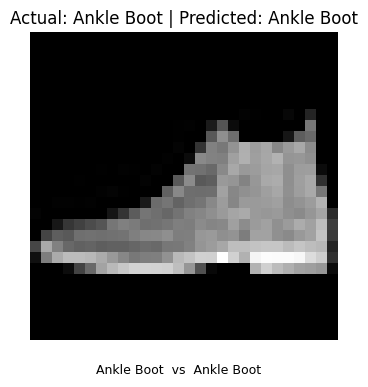

In [ ]:
idx = 0
img = X_test[idx]

actual_idx = int(y_test[idx])
pred_idx   = int(y_pred[idx])

actual_letter = apparel_dict[actual_idx]
pred_letter   = apparel_dict[pred_idx]

plt.figure(figsize=(4,4))
plt.imshow(np.squeeze(img), cmap='gray')
plt.axis('off')
# Title shows letters; subtitle shows names (optional)
plt.title(f"Actual: {actual_letter} | Predicted: {pred_letter}", fontsize=12)
plt.suptitle(f"{apparel_dict[actual_idx]}  vs  {apparel_dict[pred_idx]}", y=0.05, fontsize=9)
plt.show()

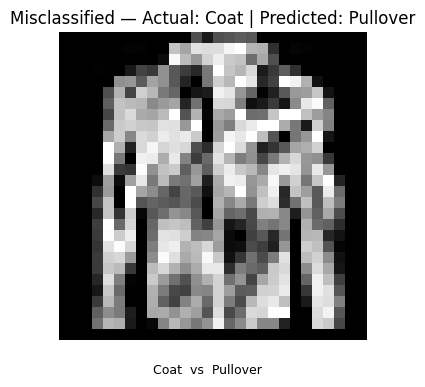

In [ ]:
mis_idx = np.where(y_pred != y_test)[0]

if len(mis_idx) > 0:
    j = int(mis_idx[0])
    img_mis = X_test[j]
    a_idx = int(y_test[j])
    p_idx = int(y_pred[j])

    a_letter = apparel_dict[a_idx]
    p_letter = apparel_dict[p_idx]

    plt.figure(figsize=(4,4))
    plt.imshow(np.squeeze(img_mis), cmap='gray')
    plt.axis('off')
    plt.title(f"Misclassified — Actual: {a_letter} | Predicted: {p_letter}", fontsize=12)
    plt.suptitle(f"{apparel_dict[a_idx]}  vs  {apparel_dict[p_idx]}", y=0.05, fontsize=9)
    plt.show()
else:
    print("No misclassifications found on the test set (model predicted all correctly).")